In [1]:
#Reto Kaggle, https://www.kaggle.com/c/shelter-animal-outcomes
#Vamos a intentar determinar el posible futuro de los animales basados en sus caracteristicas

#AnimalID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
#A715022,1,0,0,0,0
#A677429,0.5,0.3,0.2,0,0
#...
#etc.

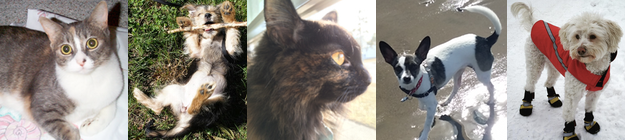

In [2]:
from IPython.display import Image
Image("https://kaggle2.blob.core.windows.net/competitions/kaggle/5039/media/kaggle_pets2.png")

In [3]:
#Preparación de Datos: El alumno demuestra la capacidad de usar las estructuras de datos necesarias para trabajar con un 
#conjunto de datos. El alumno hace las modificaciones a los datos necesarias para trabajar con la base.

# Load dependencies
import psycopg2, pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#DB Connection
db_connection = psycopg2.connect(host="192.168.99.100", port="32768",
                                user="postgres",password="",
                                dbname="postgres")

In [5]:
# Connect to the database server
db_cursor = db_connection.cursor()

In [6]:
sql_query = "SELECT animalId as ID, name as Nombre, datetime as Fecha, outcometype as Destino, outcomesubtype as SubDestino ,animaltype as Tipo, sexuponoutcome Fertilidad, ageuponoutcome as EdadAlSalir, breed as Raza, color FROM import.train;"

data = pandas.read_sql_query(sql_query, db_connection)
data.head()

,id,nombre,fecha,destino,subdestino,tipo,fertilidad,edadalsalir,raza,color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [7]:
# 2 Explorar los datos 

In [8]:
data.count()

id             26729
nombre         26729
fecha          26729
destino        26729
subdestino     26729
tipo           26729
fertilidad     26729
edadalsalir    26729
raza           26729
color          26729
dtype: int64

In [9]:
datav2 = pandas.read_sql_query(sql_query, db_connection)

In [10]:
datav2 = datav2.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

In [11]:
datav2.isnull().sum()

id                 0
nombre          7691
fecha              0
destino            0
subdestino     13612
tipo               0
fertilidad         1
edadalsalir       18
raza               0
color              0
dtype: int64

In [12]:
count_nan = len(datav2) - datav2.count()

In [13]:
count_nan

id                 0
nombre          7691
fecha              0
destino            0
subdestino     13612
tipo               0
fertilidad         1
edadalsalir       18
raza               0
color              0
dtype: int64

In [14]:
datav2["edadalsalir"].head(10)

0      1 year
1      1 year
2     2 years
3     3 weeks
4     2 years
5     1 month
6     3 weeks
7     3 weeks
8    5 months
9      1 year
Name: edadalsalir, dtype: object

In [15]:
datav2["edadalsalir"].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: edadalsalir, dtype: int64

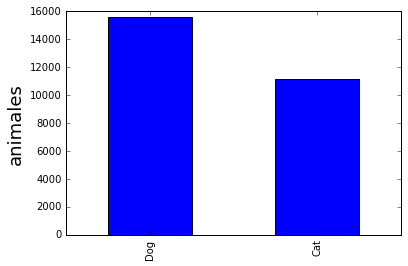

In [16]:
datav2["tipo"].value_counts().plot(kind='bar')
plt.ylabel('animales', fontsize=18)

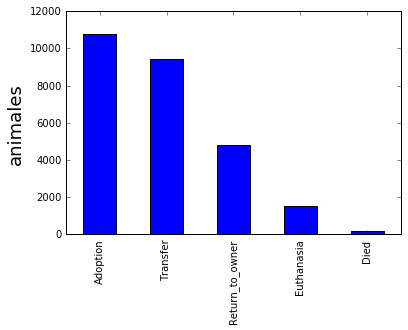

In [17]:
datav2["destino"].value_counts().plot(kind='bar')
plt.ylabel('animales', fontsize=18)

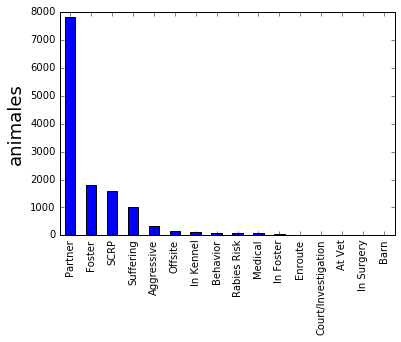

In [18]:
datav2["subdestino"].value_counts().plot(kind='bar')
plt.ylabel('animales', fontsize=18) 

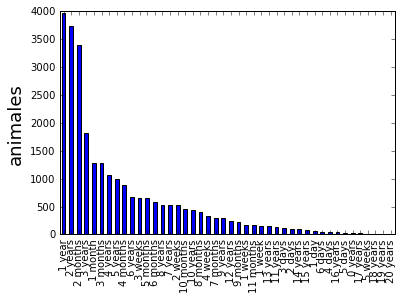

In [19]:
datav2["edadalsalir"].value_counts().plot(kind='bar')
plt.ylabel('animales', fontsize=18) 

In [20]:
def age_in_years(x):
    x = str(x)
    
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0
    
datav2['edadanios'] = datav2.edadalsalir.apply(age_in_years)    

In [21]:
datav2.head()

,id,nombre,fecha,destino,subdestino,tipo,fertilidad,edadalsalir,raza,color,edadanios
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1.000000
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1.000000
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2.000000
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0.057692
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2.000000


In [22]:
def tipoperrogato(x):
  x = str(x)
  if x == 'nan': return 0
  #tipopg = int(x.split()[0])
  if x.find('Dog') > -1: return 1 
  if x.find('Cat')> -1: return 2
  else: return 0
   
datav2['perrogato'] = datav2.tipo.apply(tipoperrogato)

In [23]:
datav2.head()

,id,nombre,fecha,destino,subdestino,tipo,fertilidad,edadalsalir,raza,color,edadanios,perrogato
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1.000000,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1.000000,2
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2.000000,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0.057692,2
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2.000000,1


In [24]:
datav2["nombre"] = datav2["nombre"].fillna('Solovino')

In [25]:
datav2["subdestino"].isnull().sum()

13612

In [26]:
datav2["subdestino"] = datav2["subdestino"].fillna('Desconocido')

In [27]:
datav2.head()

,id,nombre,fecha,destino,subdestino,tipo,fertilidad,edadalsalir,raza,color,edadanios,perrogato
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Desconocido,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1.000000,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1.000000,2
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2.000000,1
3,A683430,Solovino,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0.057692,2
4,A667013,Solovino,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2.000000,1


In [28]:
def sex(x):
  x = str(x)
  if x == 'nan': return 0
  #tipopg = int(x.split()[0])
  if x.find('Neutered Male') > -1: return 1 
  if x.find('Spayed Female') > -1: return 2 
  if x.find('Intact Male') > -1: return 3 
  if x.find('Intact Female') > -1: return 4 
  if x.find('Unknown') > -1: return 5 
    
  else: return 0
   
datav2['fertilidad_num'] = data.fertilidad.apply(sex)

In [29]:
def tipoperrogato(x):
  x = str(x)
  if x == 'nan': return 0
  #tipopg = int(x.split()[0])
  if x.find('Dog') > -1: return 1 
  if x.find('Cat')> -1: return 2
  else: return 0
   
datav2['perrogato'] = datav2.tipo.apply(tipoperrogato)

In [30]:
def state(x):
  x = str(x)
  if x == 'nan': return 0
  #tipopg = int(x.split()[0])
  if x.find('Adoption') > -1: return 1 
  if x.find('Transfer') > -1: return 2 
  if x.find('Return_to_owner') > -1: return 3 
  if x.find('Euthanasia') > -1: return 4 
  if x.find('Died') > -1: return 5 
    
  else: return 0
   
datav2['destino_num'] = data.destino.apply(state)

In [33]:
def razasimple(x):
  x = str(x)
  if x == 'nan': return 0
  #tipopg = int(x.split()[0])
  if x.find('Mix') > -1: return 1 
 
    
  else: return 0
   
datav2['mix'] = data.raza.apply(razasimple)

In [34]:
datav2.head()

,id,nombre,fecha,destino,subdestino,tipo,fertilidad,edadalsalir,raza,color,edadanios,perrogato,fertilidad_num,destino_num,mix
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Desconocido,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1.000000,1,1,3,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1.000000,2,2,4,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2.000000,1,1,1,1
3,A683430,Solovino,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0.057692,2,3,2,1
4,A667013,Solovino,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2.000000,1,1,2,0


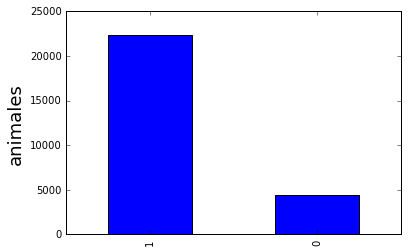

In [35]:
datav2["mix"].value_counts().plot(kind='bar')
plt.ylabel('animales', fontsize=18)

In [36]:
datav2["mix"].value_counts()

1    22298
0     4431
Name: mix, dtype: int64

In [48]:
sql_query2 = "SELECT id as ID, name as Nombre, datetime as Fecha ,animaltype as Tipo, sexuponoutcome Fertilidad, ageuponoutcome as EdadAlSalir, breed as Raza, color FROM import.test;"

In [49]:
test = pandas.read_sql_query(sql_query2, db_connection)

In [50]:
test.head()

,id,nombre,fecha,tipo,fertilidad,edadalsalir,raza,color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [ ]:
#Utilizaremos random forest tomado de:
#https://github.com/ToferC/python-machine-learning/blob/master/ML101-2%20Random%20Forest%20Classifier.ipynb

In [90]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, log_loss, average_precision_score

import logging

%matplotlib inline

In [72]:
x = datav2.loc[:,['destino','edadanios','perrogato','fertilidad_num','mix']]

In [73]:
x.head()

,destino,edadanios,perrogato,fertilidad_num,mix
0,Return_to_owner,1.000000,1,1,1
1,Euthanasia,1.000000,2,2,1
2,Adoption,2.000000,1,1,1
3,Transfer,0.057692,2,3,1
4,Transfer,2.000000,1,1,0


In [67]:
x.dtypes

edadanios         float64
perrogato           int64
fertilidad_num      int64
destino_num         int64
mix                 int64
dtype: object

In [74]:
outcomes = x.destino.unique()

In [75]:
from sklearn import preprocessing

# This code takes our text labels and creates an encoder that we use
# To transform them into an array

encoder = preprocessing.LabelEncoder()
encoder.fit(outcomes)

encoded_y = encoder.transform(outcomes)
encoded_y


array([3, 2, 0, 4, 1], dtype=int64)

In [76]:
#We still need to transform the array into a matrix - this is called one hot encoding. 
#It allows us to track the probability of each possible outcome separately.
# convert integers into dummy variables (one hot encoding)

from keras.utils import np_utils

# We'll practice with the dummy for now, but we'll transform the full labels later.
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y


array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [77]:
#We'll transform the labels into their array value, though.
x.destino = encoder.transform(x.destino)


In [78]:
x.head()

,destino,edadanios,perrogato,fertilidad_num,mix
0,3,1.000000,1,1,1
1,2,1.000000,2,2,1
2,0,2.000000,1,1,1
3,4,0.057692,2,3,1
4,4,2.000000,1,1,0


In [81]:
c = {0:'c',1:'y',2:'r', 3:'b', 4:'g'}
cmap = x.destino.map ( c )

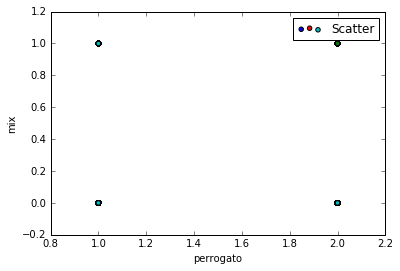

In [82]:
x.plot.scatter(x='perrogato', y='mix', c=cmap, label='Scatter', legend=True)

In [83]:
train_target = np_utils.to_categorical(x['destino'].values)
train_target

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [84]:
simple_target = x.destino.values
simple_target

array([3, 2, 0, ..., 0, 4, 4], dtype=int64)

In [87]:
train_features = x.values[:,1:]
train_features[:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  2.        ,  2.        ,  1.        ],
       [ 2.        ,  1.        ,  1.        ,  1.        ],
       [ 0.05769231,  2.        ,  3.        ,  1.        ],
       [ 2.        ,  1.        ,  1.        ,  0.        ]])

In [91]:
# Set up our train_test_split

X_train, x_test, y_train, y_test = train_test_split(train_features,
                                          train_target,
                                          test_size=0.4,
                                          random_state=42)

In [92]:
simple_X_train, simple_x_test, simple_y_train, simple_y_test = train_test_split(train_features,
                                          simple_target,
                                          test_size=0.4,
                                          random_state=42)

In [94]:
x.drop('destino', axis=1, inplace=True)

In [95]:
# New we finally get to the classifier!

clf = RandomForestClassifier(n_estimators=100)
simple_clf = RandomForestClassifier(n_estimators=100)

In [96]:
#Categorical classifier
clf = clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.5074515183637838'

In [97]:
# Simple classifier
S_clf = simple_clf.fit(simple_X_train, simple_y_train)
score = simple_clf.score(simple_X_train, simple_y_train)
"Mean accuracy of simple Random Forest: {0}".format(score)

'Mean accuracy of simple Random Forest: 0.6479391407370456'

In [98]:
clf.predict(x_test[0].reshape(1, -1))

array([[ 0.,  0.,  0.,  1.,  0.]])

In [99]:
S_clf.predict(simple_x_test[0].reshape(1, -1))

array([3], dtype=int64)

In [100]:
outcomes = encoder.inverse_transform([0, 1, 2, 3, 4])
outcomes

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], dtype=object)

In [101]:
def reverse_dict_search(d, target):
    for k, v in d.items():
        if v == target:
            return k

In [102]:
# Evaluate the model
print (X_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16037, 4) (16037, 5)
(10692, 4) (10692, 5)


In [103]:
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(x_test)

print ("Accuracy = %.2f" % (accuracy_score(y_test, y_predict)))

Accuracy = 0.50


In [104]:
# Create classification report for test data

print(classification_report(y_test, 
                            y_predict, 
                            target_names=outcomes))


                 precision    recall  f1-score   support

       Adoption       0.72      0.68      0.70      4327
           Died       0.14      0.01      0.03        71
     Euthanasia       0.48      0.06      0.11       608
Return_to_owner       0.50      0.12      0.19      1900
       Transfer       0.79      0.56      0.65      3786

    avg / total       0.69      0.50      0.56     10692



In [105]:
# Metrics for the simple labels classifier

S_y_predict = S_clf.predict(simple_x_test)

In [106]:
S_y_predict


array([3, 0, 4, ..., 0, 0, 4], dtype=int64)

In [107]:
print ("Accuracy = %.2f" % (accuracy_score(simple_y_test, S_y_predict)))

model_score = S_clf.score(simple_x_test, simple_y_test)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(simple_y_test, S_y_predict)
print ("Confusion Matrix \n", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")


Accuracy = 0.63
Model Score 0.63 

Confusion Matrix 
 [[3587    0    3  441  296]
 [   4    1    3    6   57]
 [ 126    0   48  159  275]
 [ 887    0   19  760  234]
 [ 976    6   48  376 2380]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 3587 |   0 |
Actual   |-----|-----|
       1 |   4 |   1 |
         |-----|-----|


In [108]:
print(average_precision_score(y_test, y_predict))

0.45783993293


In [109]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import interp

In [110]:
print(roc_auc_score(y_test, y_predict))

0.614721218674


In [111]:
n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

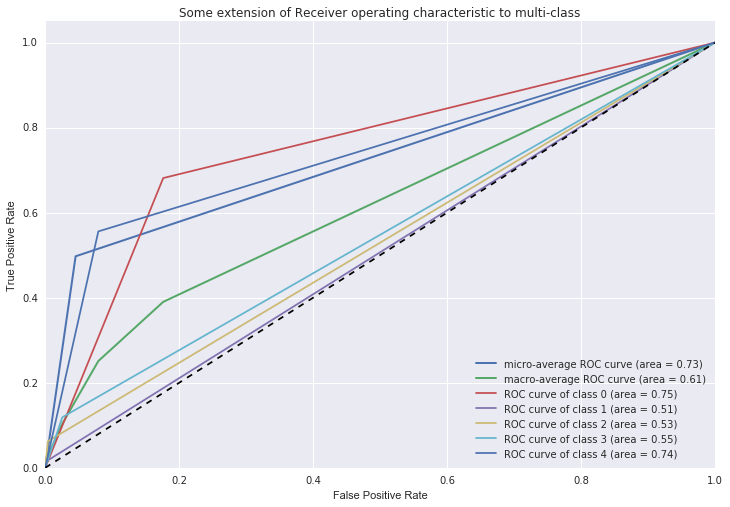

In [113]:
##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [114]:
# Plot the importance of the different features

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]
len(importances)

4

In [115]:
x.shape

(26729, 4)

1. feature 2 (0.468705)
2. feature 0 (0.438141)
3. feature 1 (0.081842)
4. feature 3 (0.011312)


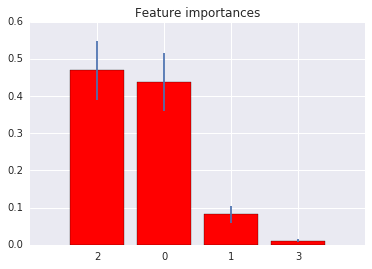

In [117]:
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [119]:
for i in [2, 0, 1, 3]:
    print("Feature {}: {}".format(i, x.columns[i]))

Feature 2: fertilidad_num
Feature 0: edadanios
Feature 1: perrogato
Feature 3: mix
